In [1]:
import pandas as pd
df=pd.read_csv('healthcare_dataset.csv')
print(df.to_string())

     patient_id   age   gender  blood_pressure glucose  cholesterol    bmi smoker  exercise_mins_week disease_risk
0           103  83.0      NaN           146.0     168        137.0  11.95      0                43.0       -0.294
1           107  52.0     Male           180.0     154        158.0  36.07      1                61.0        1.475
2            72  91.0      NaN           100.0     290        309.0  22.33    yes               250.0        0.132
3           189  18.0        F           132.0     137        127.0  18.13    NaN               234.0        0.334
4            21  93.0  Unknown           139.0     101        351.0  34.94      1               127.0        0.657
5           103  69.0  Unknown           169.0     164        241.0  33.82    NaN               186.0        1.439
6           122  37.0     Male           172.0     177        251.0  49.02      1                11.0        1.247
7           215  47.0        M           169.0     209        233.0  25.59    ye

In [2]:
df['age']=pd.to_numeric(df['age'],errors='coerce')
df.dropna(subset=['age'],inplace =True)
df['age']=df['age'].astype(int)
df.dropna(subset=['gender'],inplace =True)
df['gender'].replace({'M':'Male','F':'Female','Unknown':'Others'},inplace=True)
a=df['blood_pressure'].mean()
df.fillna({'blood_pressure':a},inplace=True)
df['blood_pressure']=df['blood_pressure'].astype(int)
df['glucose']=pd.to_numeric(df['glucose'],errors='coerce')
b=df['glucose'].mean()
df.fillna({'glucose':b},inplace =True)
df['glucose']=df['glucose'].astype(int)
df.dropna(subset=('cholesterol'),inplace=True)
c=df['bmi'].mean()
df.fillna({'bmi':c},inplace=True)
df['bmi']=df['bmi'].astype(int)
df=df[df['exercise_mins_week'] >= 0]
df['exetcise_mins_week']=df['exercise_mins_week'].astype(int)
df["disease_risk"] = pd.to_numeric(df["disease_risk"], errors="coerce")
df["disease_risk"] =df['disease_risk']
d=df['disease_risk'].mean()
df.fillna({'disease_risk':d},inplace=True)
# df['disease_risk']=df['disease_risk'].astype(int)
df=df[df['disease_risk'] >= 0 ]
df["smoker"] = (
    df["smoker"]
        .astype(str).str.lower().str.strip()
        .map({
            "1": 1, "yes": 1, "y": 1,
            "0": 0, "no": 0, "n": 0,
            "": None, "none": None, "nan": None
        })
)
df["smoker"] = pd.to_numeric(df["smoker"], errors="coerce")
df.dropna(subset=('smoker'),inplace =True)
print(df.to_string())
df.to_csv(('clean_healthcare.csv'),index=False)

     patient_id  age  gender  blood_pressure  glucose  cholesterol  bmi  smoker  exercise_mins_week  disease_risk  exetcise_mins_week
1           107   52    Male             180      154        158.0   36     1.0                61.0         1.475                  61
4            21   93  Others             139      101        351.0   34     1.0               127.0         0.657                 127
6           122   37    Male             172      177        251.0   49     1.0                11.0         1.247                  11
7           215   47    Male             169      209        233.0   25     1.0                35.0         0.654                  35
9           100   84  Female             106      275        107.0   24     0.0               180.0         0.485                 180
14          192   88    Male              89      269        347.0   52     0.0               161.0         0.317                 161
18          236   57  Female             146      109        2

C:\Users\Deep\AppData\Local\Temp\ipykernel_10524\1234804514.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({'M':'Male','F':'Female','Unknown':'Others'},inplace=True)


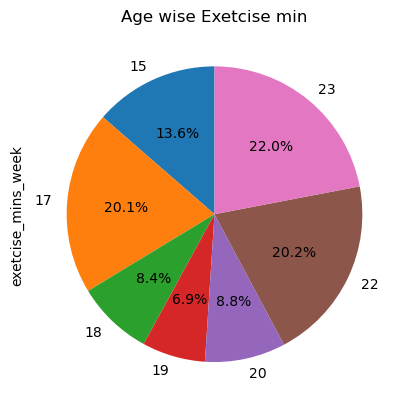

<Figure size 1000x600 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
if 'age' in df.columns:
    plt.title("Age wise Exetcise min")

    age_wise=df.groupby('age')['exetcise_mins_week'].mean().head(7).plot(kind='pie',autopct="%1.1f%%",startangle=90)
    plt.figure(figsize=(10,6))
    plt.show()


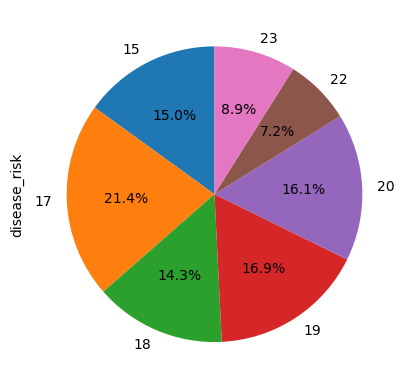

<Figure size 1000x600 with 0 Axes>

In [4]:
if 'age' in df.columns:
    plt.title("Age wise 
    disease_rank=df.groupby('age')['disease_risk'].mean().head(7).plot(kind='pie',autopct="%1.1f%%",startangle=90)
    plt.figure(figsize=(10,6))
    plt.show()

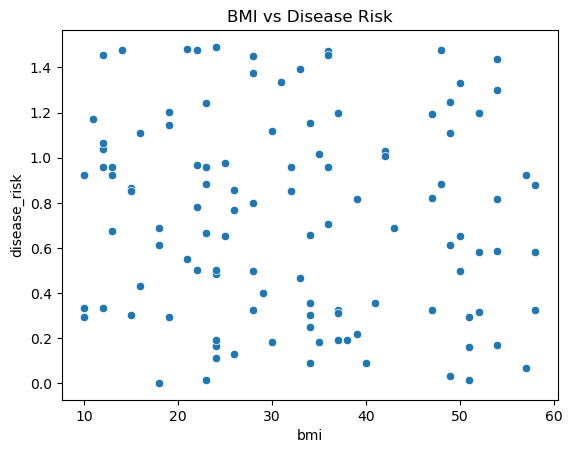

In [10]:
sns.scatterplot(x='bmi',y='disease_risk',data=df)
plt.title("BMI vs Disease Risk")
plt.show()

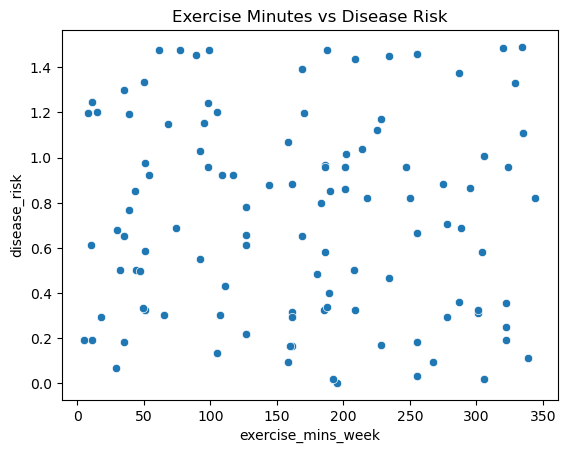

In [11]:
sns.scatterplot(x='exercise_mins_week',y='disease_risk',data=df)
plt.title("Exercise Minutes vs Disease Risk")
plt.show()

C:\Users\Deep\AppData\Local\Temp\ipykernel_10524\2823488180.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_wise.values,y=gender_wise.index,palette='viridis')


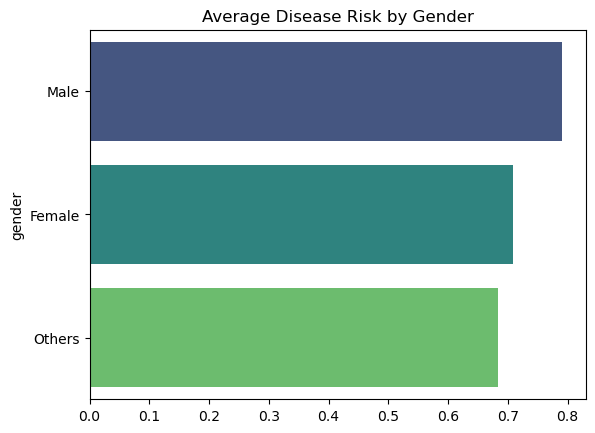

In [12]:
gender_wise=df.groupby('gender')['disease_risk'].mean().sort_values(ascending=False)
sns.barplot(x=gender_wise.values,y=gender_wise.index,palette='viridis')
plt.title("Average Disease Risk by Gender")
plt.show()